# Verzerrung-Varianz-Dilemma

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Daten

In [8]:
df = sns.load_dataset("titanic")

# Model

In [13]:
# Features
features = ["class", "sex", "sibsp", "fare"]
X = df[features]
X = pd.get_dummies(X)

# Abhängige Variable
y = df["survived"]
y = pd.get_dummies(y)

X.isnull().any(axis = 1).sum()

0

## Validierungs-Kurve

In [22]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 100, 10)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y,
                                       param_name = "max_depth",
                                       param_range = param_range,
                                       cv = 5, 
                                       scoring = "accuracy")

In [23]:
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(train_scores, axis = 1)
test_scores_std = np.std(train_scores, axis = 1)

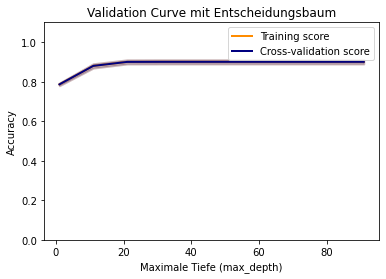

In [24]:
linewidth = 2

plt.plot(param_range, 
         train_scores_mean, 
         label="Training score",
         color="darkorange", 
         lw=linewidth)

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2,
                 color="darkorange", 
                 lw=linewidth)

plt.plot(param_range, 
         test_scores_mean, 
         label="Cross-validation score",
         color="navy", 
         lw=linewidth)

plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=linewidth)

plt.title("Validation Curve mit Entscheidungsbaum")
plt.xlabel("Maximale Tiefe (max_depth)")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.legend(loc="best");